In [41]:
#LCCC
import numpy as np

def concordance_correlation_coefficient(y_true, y_pred,
                       sample_weight=None,
                       multioutput='uniform_average'):
    """Concordance correlation coefficient.
    The concordance correlation coefficient is a measure of inter-rater agreement.
    It measures the deviation of the relationship between predicted and true values
    from the 45 degree angle.|.org/wiki/Concordance_correlation_coefficient
    Original paper: Lawrence, I., and Kuei Lin. "A concordance correlation coefficient to evaluate reproducibility." Biometrics (1989): 255-268.  
    Parameters
    ----------
    y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Estimated target values.
    Returns
    -------
    loss : A float in the range [-1,1]. A value of 1 indicates perfect agreement
    between the true and the predicted values.
    Examples
    --------
    >>> from sklearn.metrics import concordance_correlation_coefficient
    >>> y_true = [3, -0.5, 2, 7]
    >>> y_pred = [2.5, 0.0, 2, 8]
    >>> concordance_correlation_coefficient(y_true, y_pred)
    0.97678916827853024
    """
    cor=np.corrcoef(y_true,y_pred)[0][1]
    
    mean_true=np.mean(y_true)
    mean_pred=np.mean(y_pred)
    
    var_true=np.var(y_true)
    var_pred=np.var(y_pred)
    
    sd_true=np.std(y_true)
    sd_pred=np.std(y_pred)
    
    numerator=2*cor*sd_true*sd_pred
    
    denominator=var_true+var_pred+(mean_true-mean_pred)**2

    return numerator/denominator
lccc = concordance_correlation_coefficient

In [114]:
##select features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
#from sklearn.ensemble import sklearn.neural_network.MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


path = r'G:\china_geodata\yunnan_region\yn_all.csv'  # 数据文件路径
data = pd.read_csv(path, header='infer',na_values=None, engine='python', sep=',')

x = np.array(data[data.columns[list(range(44)[:13])]])
# y = pd.Categorical(data[4]).codes
y = data['cn_rate']
#y[y>75.36] =  32
scaler = StandardScaler()
#scaler = MinMaxScaler()
x = scaler.fit_transform(x)
#y = scaler.fit_transform(y)
y = y.T

x = x.reshape(-1, 13)  # 转置后，得到N个样本，每个样本都是1维的


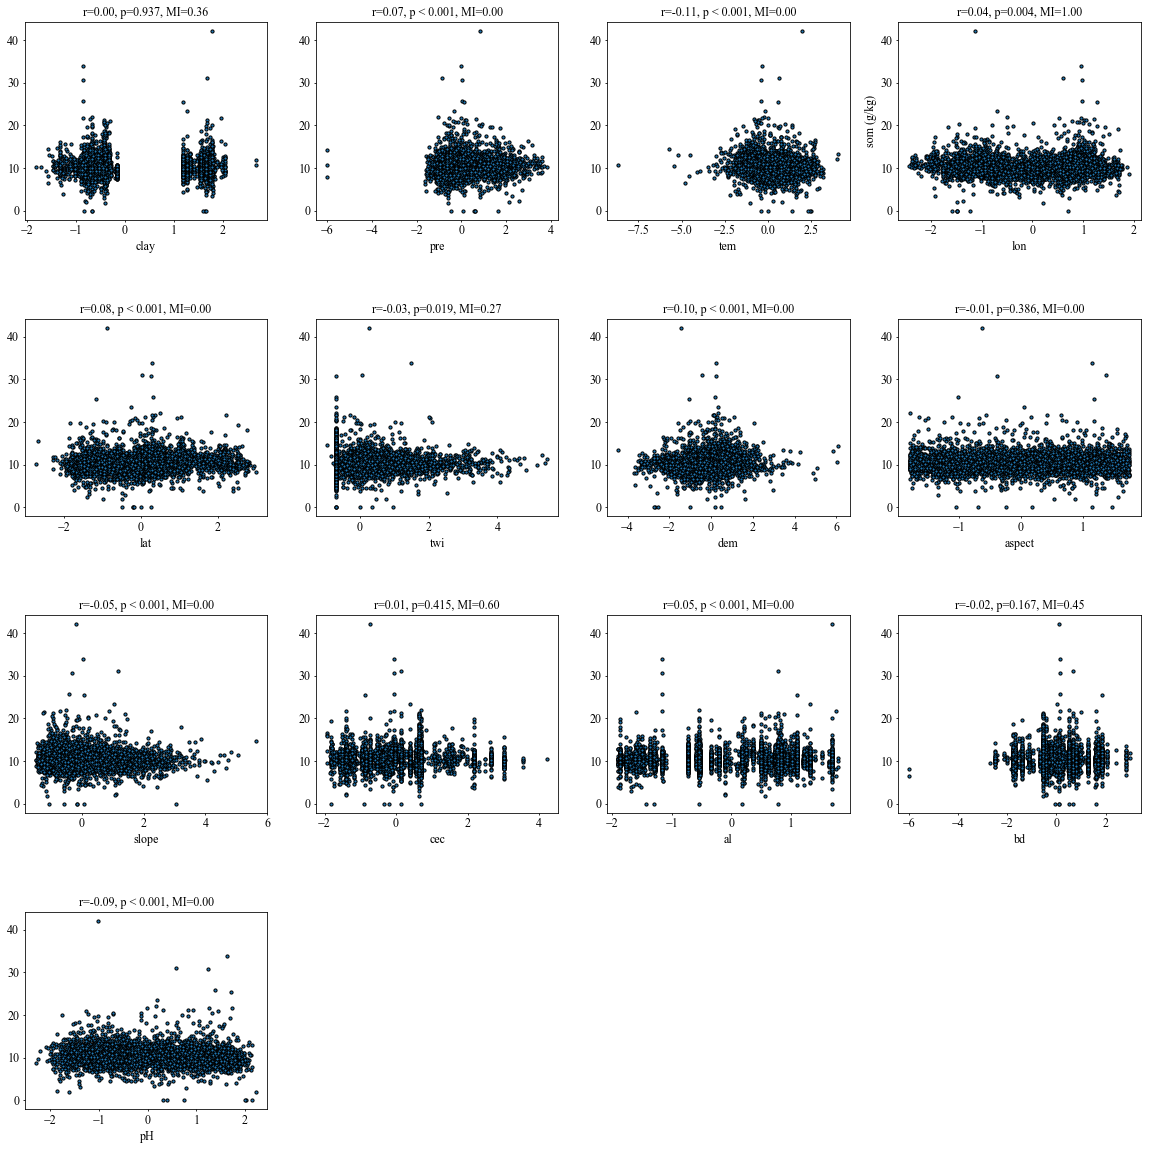

In [115]:
##Comparison of F-test and mutual information¶
from sklearn.feature_selection import f_regression, mutual_info_regression
import matplotlib.gridspec as gridspec
from pylab import *
import scipy

rc('font', family='serif', serif='Times New Roman') 

np.random.seed(0)


f_test, _ = f_regression(x, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(x, y)
mi /= np.max(mi)

cols = 4
ax = []
gs = gridspec.GridSpec(14//cols +1 , cols)
gs.update(hspace=0.5)
fig1 = plt.figure(figsize=(20, 20))

for i in range(13):
    row = (i // cols)
    col = i % cols
    r, p = scipy.stats.pearsonr(x[:,i], y)
    ax.append(fig1.add_subplot(gs[row, col]))
    ax[-1].scatter(x[:, i], y, edgecolor='black', s=10)
    ax[-1].set_xlabel(data.columns[i], fontsize=12)
    tick_params(which='major', length=2)
    if i == 3:
        ax[-1].set_ylabel("som (g/kg)", fontsize=12)
    if p < 0.001:
        plt.title("r={:.2f}, p < 0.001, MI={:.2f}".format(r, p, mi[i]),fontsize=12)
    else:
        plt.title("r={:.2f}, p={:.3f}, MI={:.2f}".format(r, p, mi[i]),fontsize=12)
plt.show()

(4949, 13) (4949,)


<Figure size 1080x504 with 0 Axes>

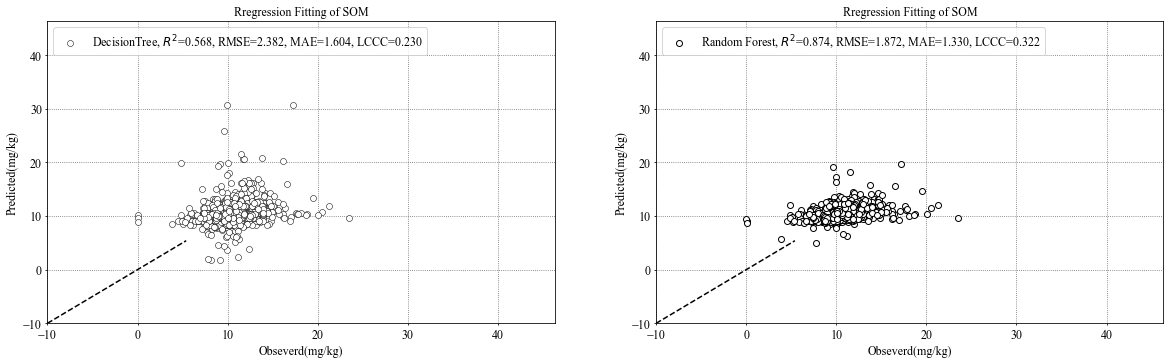

In [116]:
from sklearn.externals import joblib
import matplotlib.gridspec as gridspec
from sklearn.cross_validation import train_test_split
from pylab import *

#X =  np.array(data[['altX', 'altY', 'ele', 'dem', 'slope','aspect','b5_mean','tem','pre','b7_mean','EVI_max','NDWI_max','NDWI_mean','NDVI_mean']])
#X =  np.array(data[['slope','aspect','DEM','tem','twi','pre']])
#X =  np.array(data[['b6_mean','NDWI_max','NDWI_mean','DVI_max','DVI_mean','b1_mean','b2_mean','b3_mean','b4_mean','b5_mean',
#                      'b7_mean','NDVI_max','NDVI_mean','RVI_mean','RVI_max','EVI_max','EVI_mean','SAVI_mean','SAVI_max']])
#X.reshape(-1,7)
print(x.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)



#ridge = RidgeCV(alphas=np.logspace(-3, 2, 20), fit_intercept=False)
#ridged = Pipeline([('poly', PolynomialFeatures(degree=degree)), ('Ridge', ridge)])

random_forest = RandomForestRegressor(max_depth= 40, min_samples_leaf= 1, n_estimators= 200,oob_score=True)

mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='tanh',learning_rate ='adaptive')
dtr = DecisionTreeRegressor(max_depth= 10, min_samples_leaf= 1,random_state= None)
clf = GradientBoostingRegressor(loss='quantile',
                                n_estimators=200, max_depth=3,
                                learning_rate=0.1, min_samples_leaf=1,
                                min_samples_split=2)
svr_rbf = svm.SVR(C=15, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.005,
     max_iter=-1, shrinking=True, tol=0.001, verbose=False)
bagging_svr = BaggingRegressor(svr_rbf, n_estimators=200, max_samples=1.0)

regs = [
    ('DecisionTree', dtr),
    #('Ridge(%d Degree)' % degree, ridged),
    #('Bagging Ridge(%d Degree)' % degree, bagging_ridged),
    ('Random Forest', random_forest),]
    #('Gradientboosting', clf),
    #('MLP', mlp),
    #('SVR', svr_rbf),
    #('Bagging SVR',bagging_svr),
    #('Bagging DecisionTree', BaggingRegressor(dtr, n_estimators=200, max_samples=1.0))]
    #x_test = np.linspace(1.1*x.min(), 1.1*x.max(), 1000)
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#mpl.rcParams['axes.unicode_minus'] = False
rc('font', family='serif', serif='Times New Roman') 
plt.figure(figsize=(15, 7), facecolor='w')
    #plt.plot(x, y, 'ro', mec='k', label='训练数据')
    #plt.plot(x_test, f(x_test), color='k', lw=3, ls='-', label='真实值')
#clrs = '#FF2020', 'm', 'y', 'g', 'k', 'b'
cols = 2
ax = []
#y_all = np.array([0]*545,dtype='float64').reshape(545,)
gs = gridspec.GridSpec(5 // cols + 1, cols)
gs.update(hspace=0.3)
fig1 = plt.figure(figsize=(20, 20))
for i, (name, reg) in enumerate(regs):
    row = (i // cols)
    col = i % cols
    font1 = {'family':'Times New Roman', 'weight':'normal','size':12}
    
    
    reg.fit(X_train, y_train)
    y_pre = reg.predict(X_test)
    #print(pd.DataFrame(y_pre).describe())
    #y_all+=y_pre
    label = '%s, $R^2$=%.3f, RMSE=%.3f, MAE=%.3f, LCCC=%.3f' % (name, reg.score(X_train, y_train), 
                                                                np.sqrt(mean_squared_error(y_test, y_pre)),
                                         mean_absolute_error(y_test, y_pre), lccc(y_test, y_pre))
    #joblib.dump(reg, r'G:\china_geodata\yunnan_region'+'\\'+name+'_cn_train_model.joblib')
    ax.append(fig1.add_subplot(gs[row, col]))
    ax[-1].set_ylabel("Predicted(mg/kg)", fontsize=12)
    ax[-1].set_xlabel("Obseverd(mg/kg)", fontsize=12)
    ax[-1].scatter(y_test, y_pre, color='white',edgecolors='k',lw=(i+1)*0.5, label=label, zorder=6-i)
    
    ax[-1].set_ylim((-10, 1.1*y.max()))
    ax[-1].set_xlim((-10, 1.1*y.max()))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Rregression Fitting of SOM', font1)
    plt.legend(loc='upper left',prop=font1)
    tick_params(which='major', length=2)
    plt.grid(b=True, ls=':', color='#606060')
    sk = np.arange(-10, 5.5, 0.1)
    plt.plot(sk, sk, 'k--')
    #plt.scatter(y_test, y_pre, color=clrs[i], lw=(i+1)*0.5, label=label, zorder=6-i)

#plt.legend(loc='upper left',prop=font1)

#plt.title('Rregression Fitting of SOM', font1)
#plt.ylim((0, 1.5*y.max()))
#plt.xlim((0, 1.1*y.max()))
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#plt.tight_layout(2)
#plt.grid(b=True, ls=':', color='#606060')
plt.show()

In [ ]:
y_all = y_all/4
from sklearn.metrics import r2_score
plt.figure(figsize=(10, 10))
label = '%s, $R^2$=%.3f, RMSE=%.3f, MAE=%.3f, LCCC=%.3f' % ('all', r2_score(y_test, y_all), 
                                                                np.sqrt(mean_squared_error(y_test, y_all)),
                                         mean_absolute_error(y_test, y_all), lccc(y_test, y_all))
plt.scatter(y_test, y_all, color='k', label=label)
ax[-1].set_ylabel("Predicted(mg/kg)", fontsize=12)
ax[-1].set_xlabel("Obseverd(mg/kg)", fontsize=12)
ax[-1].scatter(y_test, y_pre, color='k', lw=(i+1)*0.5, label=label, zorder=6-i)
    
ax[-1].set_ylim((0, 1.1*y.max()))
ax[-1].set_xlim((0, 1.1*y.max()))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rregression Fitting of SOM', font1)
plt.legend(loc='upper left',prop=font1)
tick_params(which='major', length=2)
plt.grid(b=True, ls=':', color='#606060')
plt.show()
y_all.shape

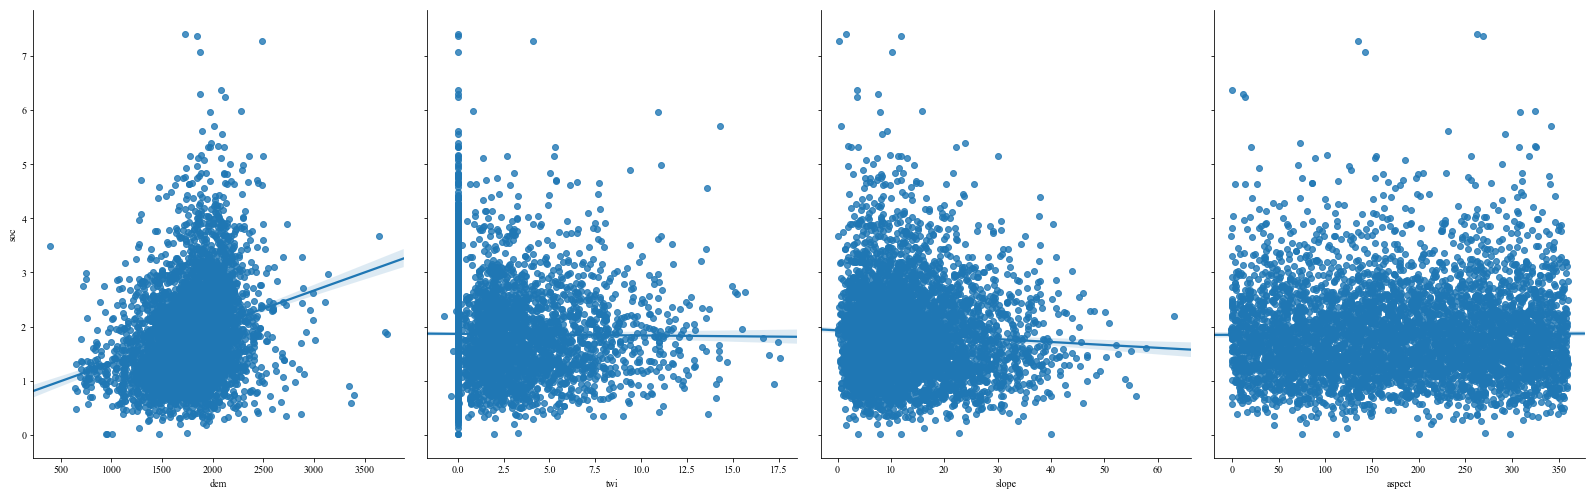

In [65]:
import seaborn as sns
sns.pairplot(data, x_vars=['dem','twi','slope', 'aspect'], \
             y_vars='soc', size=7, aspect=0.8, kind='reg')
plt.show()


In [5]:
#best param
import time
from sklearn.model_selection import GridSearchCV

gcv_rf = GridSearchCV(RandomForestRegressor(random_state=1),cv=5,param_grid={'max_depth':[20,40,50,60,80,90],
                                            'min_samples_leaf':[1],'n_estimators':[100,200]})
gcv_svr = GridSearchCV(svm.SVR(kernel='rbf'), cv=5,
                   param_grid={ 'C': [ 15, 20, 25],
                               'gamma': [ 0.002, 0.003, 0.004, 0.005],})
gcv_dtr = GridSearchCV(DecisionTreeRegressor(random_state=1), cv=5,
                   param_grid={'max_depth':[10,20,30,40],
                                            'min_samples_leaf':[1]})
gcv_bsvr = GridSearchCV(BaggingRegressor(svm.SVR(kernel='rbf')), cv=5,
                   param_grid={'max_samples':[1,2,3,4],
                                            'n_estimators':[10,100,200]})
gcv_clf = GridSearchCV(GradientBoostingRegressor(), param_grid={'n_estimators':[100,300,500], 'max_depth':[3,4,5],
                                 'min_samples_leaf':[1,2,3,4],
                                'min_samples_split':[2,3,4,5]})
t0 = time.time()
gcv_rf.fit(X_train, y_train)
fit_time1 = time.time() - t0

t0 = time.time()
#gcv_svr.fit(X_train, y_train)
fit_time2 = time.time() - t0

t0 = time.time()
gcv_dtr.fit(X_train, y_train)
fit_time3 = time.time() - t0

t0 = time.time()
#gcv_clf.fit(x_train, y_train)
fit_time4 = time.time() - t0

t0 = time.time()
#gcv_bsvr.fit(x_train, y_train)
fit_time5 = time.time() - t0
#print(fit_time1,fit_time2,fit_time3,fit_time4,fit_time5)
print('########')
print(gcv_rf.best_params_)
print('########')
#print(gcv_svr.best_params_)
print('########')
#print(gcv_dtr.best_params_)
print('########')
#print(gcv_bsvr.best_params_)
print('########')
#print(gcv_clf.best_params_)

########
{'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 200}
########
########
{'max_depth': 10, 'min_samples_leaf': 1}
########
########


In [3]:
mpl.matplotlib_fname()

'/home/cd/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

Feature ranking:
1. feature 4 (0.117031)
2. feature 2 (0.116799)
3. feature 12 (0.115994)
4. feature 3 (0.115287)
5. feature 1 (0.105271)
6. feature 7 (0.081270)
7. feature 8 (0.072992)
8. feature 6 (0.071591)
9. feature 0 (0.060301)
10. feature 5 (0.039663)
11. feature 9 (0.038965)
12. feature 10 (0.037406)
13. feature 11 (0.027430)


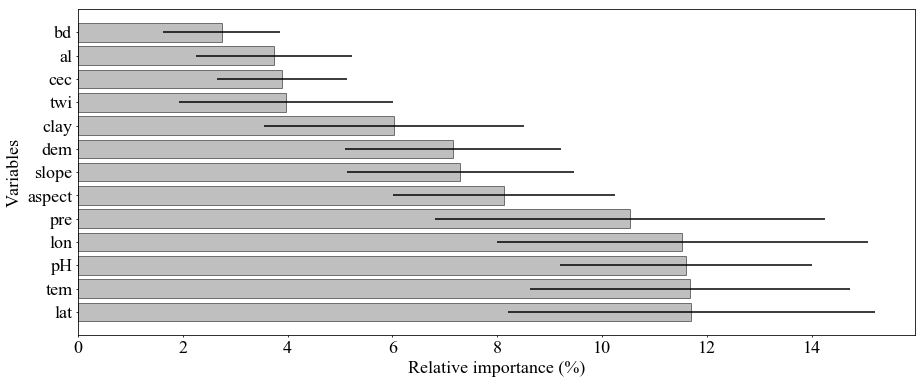

In [117]:
#a=['slope','twi','pre_mean','b6_mean','savi_max','evi_max','ndvi_max']
#['Longitude','Aspect','TWI','MAP','B1','NDVI_max','EVI_max','B4','EVI','DVI']
importances = random_forest.feature_importances_


std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15, 6), facecolor='w')
#plt.title("Feature importances")
font1 = {'family':'Times New Roman', 'weight':'normal','size':18}
plt.xlabel('Relative importance (%)', font1)
plt.ylabel('Variables', font1)
#plt.grid(b=True, ls=':', color='#606060')
#data.boxplot()
#plt.boxplot([y], vert=False)#x.shape[1]),
plt.barh(range(x.shape[1]), 100*importances[indices],
       edgecolor="k",xerr=100*std[indices], align="center",color="grey",alpha=0.5, ecolor="k")
plt.yticks(range(x.shape[1]),data.columns[indices],fontsize=18)
plt.xticks(fontsize=18)
tick_params(which='major', length=2)
plt.ylim([-1, x.shape[1]])
plt.show()

[0.11663596 0.11286212 0.10985225 0.10968783 0.10234624 0.07806302
 0.07278818 0.07012506 0.05780214 0.03617076 0.03608324 0.03564965
 0.0353703  0.02656325] ### [0.03508511 0.03326054 0.03226727 0.02552184 0.03541467 0.02330803
 0.01893856 0.02170303 0.02291187 0.01290059 0.01508803 0.01669977
 0.01196251 0.01194191] Index(['dem', 'lat', 'twi', 'pre_slope', 'lon', 'cec', 'al', 'slope', 'tem',
       'bd', 'tem_slope', 'aspect', 'lucc', 'pH'],
      dtype='object')


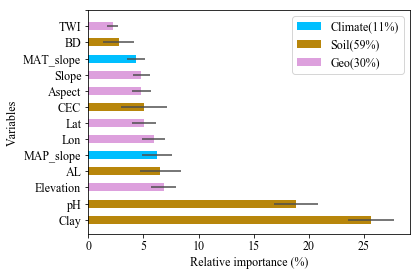

In [112]:
print(importances[indices],'###', std[indices],data.columns[indices+2])
climate = np.array([0.06238128,0.04305173])*100
soil = np.array([0.25663724, 0.18820861, 0.06523375,0.05051754,\
                 0.0273923])*100
geo = np.array([ 0.06827752,0.05928891, 0.05051754, 0.04803057, 0.04803057, 0.02201126])*100
climate_std = np.array([0.01340298, 0.00823703])*100
soil_std = np.array([0.02093796,0.0202194,\
                     0.01877678,0.02065285,0.01416627])*100
geo_std = np.array([0.01145527,0.01037766, 0.01072488, 0.00867193, 0.00778869, 0.00535386])*100
n_groups = len(indices)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.5
#rc('font', family='serif', serif='Times New Roman', size=12)
opacity = 0.4
error_config = {'ecolor': '0.3'}
var = ['Clay', 'pH', 'Elevation', 'AL', 'MAP_slope', 'Lon', 'Lat', 'CEC', 'Aspect',\
       'Slope', 'MAT_slope', 'BD', 'TWI']
rects1 = ax.barh([5, 11], climate, bar_width,
                color='deepskyblue',
                xerr=climate_std, error_kw=error_config,
                label='Climate({:.0f}%)'.format(climate.sum()))

rects2 = ax.barh([1, 2, 4, 8,12], soil, bar_width,
                color='darkgoldenrod',
                xerr=soil_std, error_kw=error_config,
                label='Soil({:.0f}%)'.format(soil.sum()))
rects3 = ax.barh([3, 6, 7, 9, 10, 13], geo, bar_width,
                color='plum',
                xerr=geo_std, error_kw=error_config,
                label='Geo({:.0f}%)'.format(geo.sum()))


plt.xlabel('Relative importance (%)')
plt.ylabel('Variables')
ax.set_yticks(index+1)
ax.set_yticklabels(var)
ax.legend()

fig.tight_layout()
plt.show()

Feature ranking:
1. feature 0 (0.330341)
2. feature 14 (0.226380)
3. feature 12 (0.072591)
4. feature 4 (0.054693)
5. feature 10 (0.047829)
6. feature 11 (0.044643)
7. feature 2 (0.033139)
8. feature 6 (0.032696)
9. feature 3 (0.029465)
10. feature 8 (0.022004)
11. feature 1 (0.021548)
12. feature 7 (0.019359)
13. feature 13 (0.018743)
14. feature 15 (0.018502)
15. feature 9 (0.018159)
16. feature 5 (0.009907)
#####################################
Index(['lat', 'an', 'pH', 'slope', 'ph_1', 'lucc', 'dem', 'pre_slope',
       'aspect', 'al', 'twi', 'cec', 'som', 'ap', 'bd', 'tem_slope'],
      dtype='object')
#####################################
Feature ranking:
1. feature 0 (0.255596)
2. feature 14 (0.184499)
3. feature 12 (0.065129)
4. feature 10 (0.049478)
5. feature 11 (0.049175)
6. feature 6 (0.048309)
7. feature 3 (0.046959)
8. feature 4 (0.046884)
9. feature 2 (0.043020)
10. feature 7 (0.038555)
11. feature 8 (0.038218)
12. feature 1 (0.036056)
13. feature 9 (0.034935)
14. featur

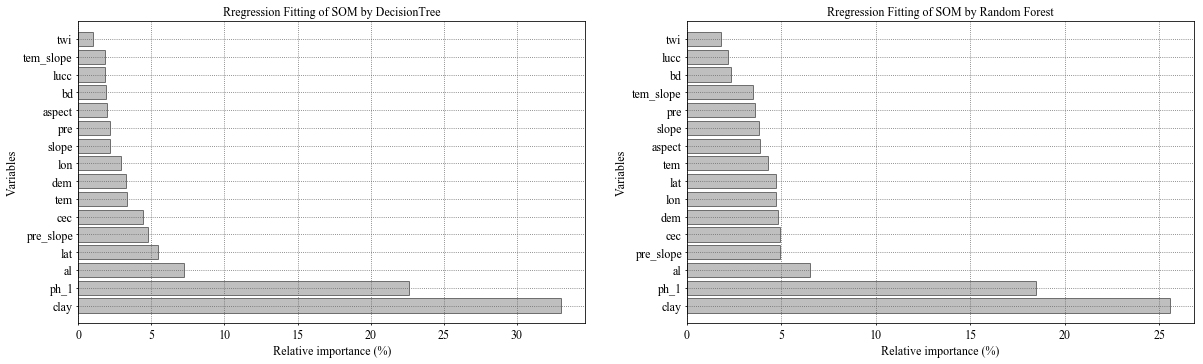

In [103]:
regs = [
    ('DecisionTree', dtr),
    #('Ridge(%d Degree)' % degree, ridged),
    #('Bagging Ridge(%d Degree)' % degree, bagging_ridged),
    ('Random Forest', random_forest),
    #('Gradientboosting', clf),
    #('MLP', mlp),
    #('SVR', svr_rbf),
    #('Bagging DecisionTree', BaggingRegressor(dtr))
    ]
    #x_test = np.linspace(1.1*x.min(), 1.1*x.max(), 1000)
cols = 2
ax = []
gs = gridspec.GridSpec(4 // cols + 1, cols)
gs.update(hspace=0.3)
fig2 = plt.figure(figsize=(20, 20))
for i, (name, reg) in enumerate(regs):
    if reg == 'svr_rbf':
        pass
    row = (i // cols)
    col = i % cols
    font1 = {'family':'Times New Roman', 'weight':'normal','size':12}
    
    importances = reg.feature_importances_


#std = np.std([tree.feature_importances_ for tree in dtr.estimators_],
#             axis=0)
    indices = np.argsort(importances)[::-1]

# Print the feature ranking
    print("Feature ranking:")

    for f in range(16):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    ax.append(fig2.add_subplot(gs[row, col]))
    ax[-1].barh(range(16), 100*importances[indices],edgecolor="k", align="center",color="grey",alpha=0.5, ecolor="k")
    plt.yticks(range(16), data.columns[indices],fontsize=18)
    plt.xticks(fontsize=18)
    tick_params(which='major', length=2)
    plt.ylim([-1, x.shape[1]])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Rregression Fitting of SOM by '+name, font1)
    #plt.legend(loc='upper left',prop=font1)
    tick_params(which='major', length=2)
    plt.grid(b=True, ls=':', color='#606060')
# Plot the feature importances of the forest

#plt.title("Feature importances")

    plt.xlabel('Relative importance (%)', font1)
    plt.ylabel('Variables', font1)
    print('#####################################')
    print(data.columns[indices+4])
    print('#####################################')
#plt.grid(b=True, ls=':', color='#606060')
#data.boxplot()
#plt.boxplot([y], vert=False)#x.shape[1]),


plt.show()

In [27]:
data.columns

Index(['altX', 'altY', 'dem', 'aspect', 'slope', 'twi', 'pH', 'som', 'an',
       'ap', 'ak', 'tn', 'tp', 'tk', 'cl'],
      dtype='object')

In [32]:
#regional
#
def writeTiff(im_data,im_width,im_height,im_bands,im_geotrans,im_proj,path):
    if 'int8' in im_data.dtype.name:
        datatype = gdal.GDT_Byte
    elif 'int16' in im_data.dtype.name:
        datatype = gdal.GDT_UInt16
    else:
        datatype = gdal.GDT_Float32

    if len(im_data.shape) == 3:
        im_bands, im_height, im_width = im_data.shape
    elif len(im_data.shape) == 2:
        im_data = np.array([im_data])
    else:
        im_bands, (im_height, im_width) = 1,im_data.shape
        #创建文件
    driver = gdal.GetDriverByName("GTiff")
    dataset = driver.Create(path, im_width, im_height, im_bands, datatype)
    if(dataset!= None):
        dataset.SetGeoTransform(im_geotrans) #写入仿射变换参数
        dataset.SetProjection(im_proj) #写入投影
    for i in range(im_bands):
        dataset.GetRasterBand(i+1).WriteArray(im_data[i])
    del dataset


(913815, 4)
945 967 1


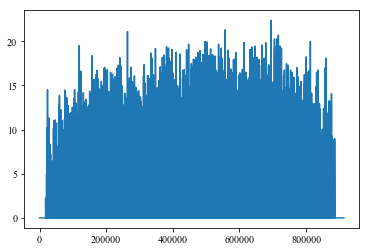

In [141]:
import os
import numpy as np
from osgeo import gdal
#['slope','twi','pre_mean','b6_mean','savi_max','evi_max','ndvi_max']
path = r'G:\china_geodata\yunnan_region\var'
out_path = r'G:\china_geodata\yunnan_region\prediction'
#print(os.walk(path))
ds = gdal.Open(path+'//'+'dem.tif')
tr = ds.GetGeoTransform()
prj = ds.GetProjection()
x1 = ds.RasterXSize
y1 = ds.RasterYSize
im_bands = ds.RasterCount #波段数
dem = ds.ReadAsArray(0, 0, x1, y1).reshape(-1, 1)
aspect = gdal.Open(path+'//'+'aspect.tif').ReadAsArray(0, 0, x1, y1).reshape(-1, 1)
slope = gdal.Open(path+'//'+'slope.tif').ReadAsArray(0, 0, x1, y1).reshape(-1, 1)
twi = gdal.Open(path+'//'+'twi.tif').ReadAsArray(0, 0, x1, y1).reshape(-1, 1)
lat = gdal.Open(path+'//'+'lat.tif').ReadAsArray(0, 0, x1, y1).reshape(-1, 1)
lon = gdal.Open(path+'//'+'lon.tif').ReadAsArray(0, 0, x1, y1).reshape(-1, 1)
name1 = ['lon', 'lat', 'dem', 'aspect','slope', 'twi']
#arr = np.append([b1, b2, b3, dem, ndvi, mat],axis=0)
arr = np.hstack(( dem, aspect, slope,twi))
#arr1 = np.append(B1,B2,axis=1)
#arr2 = np.append(B3,Elevation,axis=1)
#arr3 = np.append(NDVI_MAX,MAT,axis=1)
#arr4 = np.append(MAP,NDVI,axis=1)
#arr5 = np.append(arr4,TWI,axis=1)
#arr6 = np.append(arr5,arr3,axis=1)
#arr7 = np.append(arr1,arr2,axis=1)
#arr8 = np.append(arr6,arr7,axis=1)

#arr = arr5.reshape(-1, 6)
print(arr.shape)
print(x1, y1, im_bands,)
arr[arr<0]=0
plt.plot(arr[:,3])

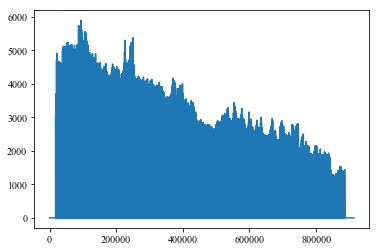

In [121]:
dem[dem > 10000] = 0
dem[dem < -200] = 0
plt.plot(dem)

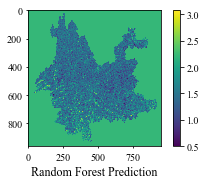

In [161]:
env = r'G:\china_geodata\yunnan_region'
models = [#('Bagging Decision Tree',env+'//'+'Bagging DecisionTree_som_train_model.joblib'),
         #('Decision Tree',env+'//'+'DecisionTree_som_train_model.py'),
         ('Random Forest',env+'//'+'Random Forest_tk_train_model.joblib'),
         #('SVR',env+'//'+'SVR_som_train_model.joblib'),
        ]
#where_are_nan = np.isnan(arr)
#where_are_inf = np.isinf(arr)
#arr[where_are_nan] = 0
#arr[where_are_inf] = 0
#arr = scaler.fit_transform(arr)
cols = 2
ax = []
gs = gridspec.GridSpec(4 // cols + 1, cols)
gs.update(hspace=0.5)
fig1 = plt.figure(figsize=(10, 10))
for i, (name, mod) in enumerate(models):
    reg1=joblib.load(mod)
    yn_tn = reg1.predict(arr)
    yn_tn1 = yn_tn.reshape(y1,x1)
    
    row = (i // cols)
    col = i % cols
    ax.append(fig1.add_subplot(gs[row, col]))
    
    ax[-1].set_xlabel(name+ ' Prediction', fontsize=12)
    tick_params(which='major', length=2)
    plt.imshow(yn_tn1)
    plt.colorbar()
    writeTiff(yn_tn1, x1, y1, im_bands, tr, prj, out_path+'//'+name+'_tk.tif')


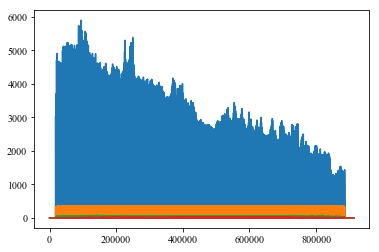

In [144]:
plt.plot(arr)#arr[230*214:230*214+2,2]

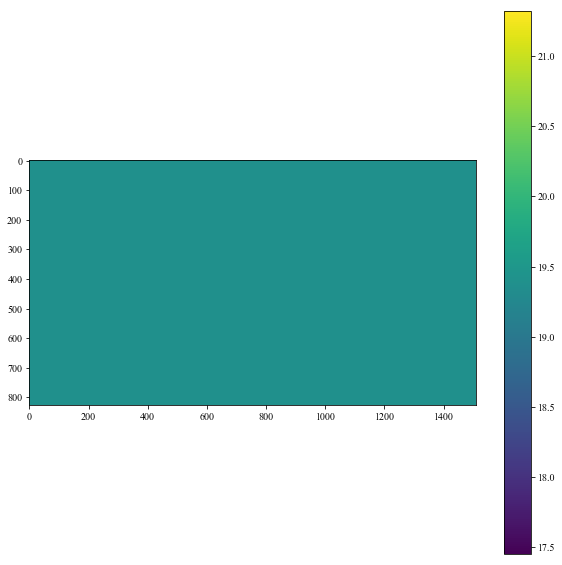

In [41]:
%matplotlib inline

from osgeo import gdal
#import rasterio
import matplotlib.pyplot as plt

np.nan_to_num(arr)
#arr9 = scaler.fit_transform(arr8)
cols = 2
ax = []
gs = gridspec.GridSpec(4 // cols + 1, cols)
gs.update(hspace=0.5)
fig1 = plt.figure(figsize=(10, 10))

dtr = joblib.load(r"F:\Hubei_SOM_MODIS_500m_prediction_2017\regional\SVR_train_model.py")
#for i, (name, reg) in enumerate(regs):
#    reg.fit(X_test, y_test)
#    yn_tn = reg.predict(arr)
#    yn_tn1 = yn_tn.reshape(y1,x1)
    
#    row = (i // cols)
#    col = i % cols
#    ax.append(fig1.add_subplot(gs[row, col]))
    
#    ax[-1].set_xlabel(name+ ' Prediction', fontsize=12)
#    tick_params(which='major', length=2)
#    plt.imshow(yn_tn1)
 #   plt.colorbar()
#    writeTiff(yn_tn1, x1, y1, im_bands, tr, prj, out_path+'//'+name+'_som.tif')
yn_tn = dtr.predict(arr)
yn_tn1 = yn_tn.reshape(y1,x1)
plt.imshow(yn_tn1)
plt.colorbar()    


In [59]:
np.isinf(arr8.any())

False

In [68]:

writeTiff(yn_tn1, x1, y1, im_bands, tr, prj, out_path+'//'+'som.tif')